
###### <font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-7)</h1></font>
<font color="#5b5a59"><h2 align="left">Práctica sobre Redes Neuronales</h2></font>

En esta práctica desarrollarás con Keras y TensorFlow varios modelos de redes neuronales de diferente complejidad. 

Todas las respuestas a los ejercicios de la práctica se deben incluir en este mismo notebook, bien completando el código en los lugares indicados, bien respondiendo a las preguntas planteadas. 

*Versión 1, actualizada el 07-01-2022*



### <font color="#CA3532">Instrucciones</font>

- La práctica se realizará de manera individual.

- Sólo debes entregar este notebook con las soluciones a los ejercicios planteados.

- La entrega se realizará a través de la plataforma de Instituto BME antes de que acabe el plazo establecido.

- No olvides incluir tu nombre y apellidos en el siguiente bloque de código.


In [1]:
# TO-DO: Incluye tu nombre y apellidos aqui:
student_data = {'nombre': 'Carlos', 'apellidos': 'Mercadal Carretero'}

### <font color="#CA3532">Acceso al material de la práctica</font>

La forma más sencilla de acceder a todo el material de la práctica es clonar este repositorio de ``github``:

In [ ]:
!git clone https://github.com/luisferuam/MIAX7

### <font color="#CA3532">Carga de librerías</font>

La siguiente celda carga todas las librerías necesarias para la práctica. Si necesitas alguna librería adicional inclúyela al final.

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('MIAX7')
import dlfbt

# Incluye aquí otros imports que necesites

### <font color="#CA3532">Parte I: Modelos sencillos con Keras</font>

Los primeros modelos los haremos con datos generados de manera artificial. La siguiente celda crea un problema de regresión en una dimensión y representa gráficamente ``t`` frente a ``x``:

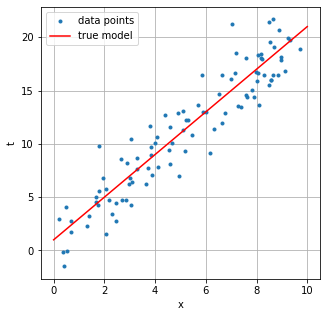

Forma de x: (100, 1)
Forma de t: (100, 1)


In [3]:
dg = dlfbt.DataGeneratorLinear1D()
dg.create_dataset(seed=21)
dg.plot_dataset()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

#### <font color="#CA3532">Ejercicio 1</font> [1 punto]

Construye en Keras un modelo de regresión lineal para predecir la variable ``t`` a partir de la variable ``x``.

<font color="#CA3532">[1.1]</font> Define del modelo completando el código de la celda siguiente:

In [4]:
model = keras.Sequential()

#-------------------------------------------------------------
model.add(keras.layers.InputLayer(input_shape = (1,), name='entrada')) #Inicializamos una capa de entrada con una neurona, puesto que será el dato de entrada. 
model.add(keras.layers.Dense(1, activation="linear", name="salida")) #Establecemos una capa de salida con 1 neurona, puesto que nuestro objetivo es saber el valor de t dado el valor de entrada x.
#-------------------------------------------------------------

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 salida (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[1.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [5]:
#-------------------------------------------------------------
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001),
              loss='mse')
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

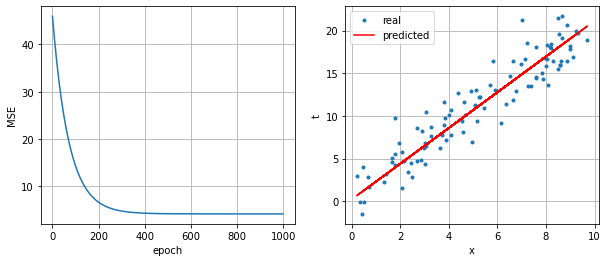

In [6]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
y = model.predict(dg.x)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.x, y, 'r-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

#### <font color="#CA3532">Ejercicio 2</font> [1 punto] 

A continuación vas a resolver un problema de regresión no lineal, también en una dimensión. La siguiente celda crea el problema y representa gráficamente ``t`` frente a ``x``:

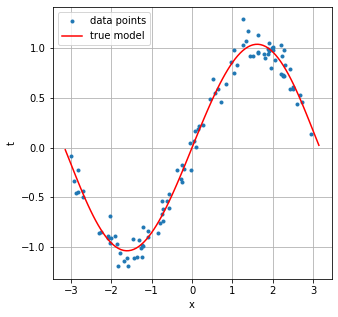

Forma de x: (100, 1)
Forma de t: (100, 1)


In [7]:
dg = dlfbt.DataGeneratorNonLinear1D(coefs=[0, 1, 0, -0.15, 0, 0.005])
dg.create_dataset(xmin=-3.14, xmax=3.14, noise=0.1, seed=21)
dg.plot_dataset()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

<font color="#CA3532">[2.1]</font> Define del modelo de regresión completando el código de la celda siguiente:

In [8]:
model = keras.Sequential()

#-------------------------------------------------------------
model.add(keras.layers.InputLayer(input_shape = (1), name='entrada')) #Inicializamos una capa de entrada con una neurona, puesto que será el dato de entrada. 
model.add(keras.layers.Dense(10, activation="tanh", name="oculta")) #Usamos la función de activación tanh.
model.add(keras.layers.Dense(1, activation='linear', name='salida'))
#-------------------------------------------------------------

<font color="#CA3532">[2.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [9]:
#-------------------------------------------------------------
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.06),
              loss='mse')
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

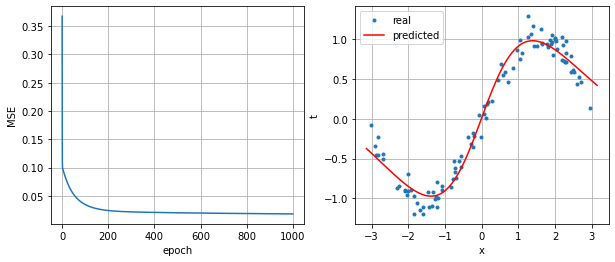

In [10]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
y = model.predict(dg.modelx)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.modelx, y, 'r-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

#### <font color="#CA3532">Ejercicio 3</font> [1 punto]

Finalmente vamos a plantear un problema de regresión logística. La siguiente celda crea los datos del problema (en dos dimensiones) y representa gráficamente la distribución de ``x`` para las dos clases ``t=0`` y ``t=1``:

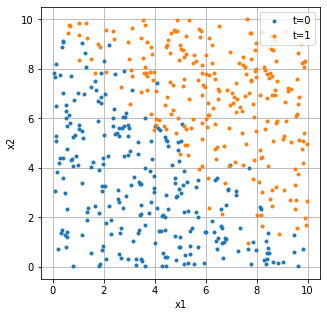

Forma de x: (500, 2)
Forma de t: (500, 1)


In [11]:
dg = dlfbt.DataGeneratorLogistic(a=[2.0, 2.0], b=-20.0)
dg.create_dataset(n=500, seed=17)

plt.figure(figsize=(5, 5))
ix0 = (dg.t.ravel() == 0)
plt.plot(dg.x[ix0, 0], dg.x[ix0, 1], '.', label='t=0')
ix1 = (dg.t.ravel() == 1)
plt.plot(dg.x[ix1, 0], dg.x[ix1, 1], '.', label='t=1')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.show()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

<font color="#CA3532">[3.1]</font> Construye en Keras un modelo de regresión logística para predecir la variable ``t`` a partir de la variable ``x``. Define del modelo completando el código de la celda siguiente:

In [12]:
model = keras.Sequential()

#-------------------------------------------------------------
model.add(keras.layers.InputLayer(input_shape =(2), name='entrada'))
model.add(keras.layers.Dense(10, activation='relu', name='oculta'))
model.add(keras.layers.Dense(1, activation='sigmoid', name='salida'))      
#-------------------------------------------------------------


<font color="#CA3532">[3.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. Añade las opciones necesarias para que se genere, además del ``loss``, la métrica ``accuracy``. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [13]:
#-------------------------------------------------------------
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.04),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

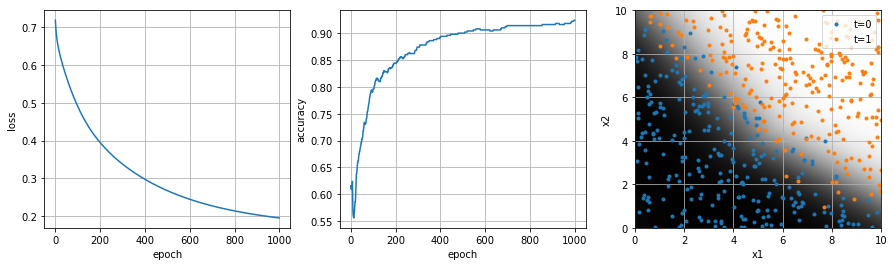

In [14]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')

xx, yy = np.meshgrid(np.arange(0, 10, 0.01), np.arange(0, 10,0.01))
xy = np.concatenate([xx.reshape([-1, 1]), yy.reshape([-1, 1])], axis=1)
z = model.predict(xy)

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, z.reshape(xx.shape), 100, cmap="gray")
plt.plot(dg.x[ix0, 0], dg.x[ix0, 1], '.', label='t=0')
plt.plot(dg.x[ix1, 0], dg.x[ix1, 1], '.', label='t=1')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0, 10, 0, 10])
plt.legend(loc='upper right')

plt.show()

#### <font color="#CA3532">Ejercicio 4</font> [1 punto]

En este ejercicio vas a construir una red neuronal un poco más compleja y la vas a probar con distintos casos de prueba. La red debe tener las siguientes características:

- Una capa de entrada con 54 unidades.
- Dos capas ocultas, con 256 y 32 unidades respectivamente, función de activación ``sigmoid`` y ``batch normalization``.
- Una capa de salida con 7 unidades ``softmax``. 
- Se debe aplicar ``dropout`` con parámetro 0.2 en las dos capas ocultas.
- Se debe incluir regularización L2, con parámetro 0.01, y L1, con parámetro 0.005, en los pesos de todas las capas (no debe afectar a los bias). 
- Todos los pesos de la red se deben inicializar con el método Xavier (ver transparencias [dffn.pdf](https://drive.google.com/file/d/1psQNeGuRtCanUHX8d-nJnO_HHGO49bLI/view?usp=sharing), p. 86).

<font color="#CA3532">[4.1]</font> Completa el código de la siguiente celda con tu solución:


In [15]:
model = keras.Sequential()

#-------------------------------------------------------------
model.add(keras.layers.InputLayer(input_shape =(54), name='entrada'))

#Capa oculta 1

model.add(keras.layers.Dense(256, kernel_initializer=keras.initializers.glorot_normal(), 
                             kernel_regularizer=keras.regularizers.l1_l2(l1=0.005, l2=0.01), name='oculta_uno'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(tf.nn.sigmoid))
model.add(keras.layers.Dropout(rate=0.2))

#Capa oculta 2

model.add(keras.layers.Dense(32, kernel_initializer=keras.initializers.glorot_normal(),
                             kernel_regularizer=keras.regularizers.l1_l2(l1=0.005, l2=0.01), name='oculta_dos'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(tf.nn.sigmoid))
model.add(keras.layers.Dropout(rate=0.2))

#capa salida
model.add(keras.layers.Dense(7, kernel_initializer=keras.initializers.glorot_normal(),
                             kernel_regularizer=keras.regularizers.l1_l2(l1=0.005, l2=0.01),name='salida'))   
model.add(keras.layers.Activation(tf.nn.softmax))
#-------------------------------------------------------------

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta_uno (Dense)          (None, 256)               14080     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 oculta_dos (Dense)          (None, 32)                8224      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

<font color="#CA3532">[4.2]</font> Si has hecho todo bien, tu modelo debería tener 23111 parámetros entrenables. Explica de dónde sale este número:

<font color="#CA3532">

Los parámetros de una red neuronal vienen dadas por los resultantes de W*X + B, en las cuales W y B son elementos entrenables. Por ejemplo, en la capa oculta uno el número de parámetros es 14080, resultante de (256 * 54) + 256 = 14080 elementos entrenables. No obstante, es necesario tener en cuenta que hay situaciones en las cuales pueden existir parámetros que no sean entrenables; esto sucede en el caso del batch normalization. Debemos recordar que la función del batch normalization es normalizar el mini-batch en concreto mediante el escalado de las variables de salida de la capa, de forma que la capa posterior tenga como input unos datos de entrada normalizados. La normalización en el batch  normalization utiliza cuatro parámetros, dos de los cuales pretenden escalar nuestros pesos en en media y varianza, dos parámetros que no son entrenables. De este modo, tenemos 256x2 parámetros en la capa oculta uno y 32x2 parámetros en la capa oculta dos que no son entrenables (576).
</font>

#### <font color="#CA3532">Ejercicio 5</font> [1 punto]

A continuación vamos a hacer una serie de pruebas para verificar que tu modelo está bien construido. Para ello vamos a usar los datos del problema de clasificación Forest Covertypes. El problema consiste en predecir el tipo de cubierta vegetal de un terreno a partir de características del mismo como su elevación, su pendiente, etcétera. Los detalles del problema los puedes consultar en estos enlaces:

https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes

https://archive.ics.uci.edu/ml/datasets/Covertype

La siguiente celda carga y prepara los datos:


In [16]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype()
x = data.data
t = data.target - 1

A continuación imprimimos la forma de las variables ``x`` e ``y``, así como los valores numéricos de cada una de las 7 clases del problema:

In [17]:
print(x.shape)
print(t.shape)
print(np.unique(t))

(581012, 54)
(581012,)
[0 1 2 3 4 5 6]


<font color="#CA3532">[5.1]</font> Lo primero que debes hacer es dividir los datos en conjuntos de entrenamiento y test usando la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``scikit-learn``. El conjunto de test debe tener el 30% de los datos. La semilla (``random_state``) se debe fijar al valor 19 para que los resultados sean reproducibles. Utiliza los nombres de variable ``x_train``, ``x_test``, ``t_train`` y ``t_test``.

In [18]:
#-------------------------------------------------------------
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state =19)
#-------------------------------------------------------------

<font color="#CA3532">[5.2]</font> A continuación estandariza los datos usando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [19]:
#-------------------------------------------------------------
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#-------------------------------------------------------------

<font color="#CA3532">[5.3]</font> En la celda siguiente, compila el modelo usando como optimizador ``SGD`` con un learning rate de ``0.01`` y como función de coste ``cross-entropy``. A continuación carga los pesos del fichero ``random-weights``.

In [20]:
fichero_pesos = "MIAX7/data/covertype/random-weights"

#-------------------------------------------------------------
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.load_weights(fichero_pesos)
#-------------------------------------------------------------

En la celda siguiente se evalúa el modelo sobre el conjunto de datos. Como tu modelo parte de unos pesos determinados, los resultados deberían ser reproducibles. 

Si has hecho todo bien deberías obtener este resultado (no es demasiado bueno, pero ten en cuenta que el modelo aún no ha sido entrenado):

````
5447/5447 [==============================] - 9s 2ms/step - loss: 11.0617 - acc: 0.4868
[11.06167984008789, 0.48682186007499695]
````

In [21]:
model.evaluate(x_test, t_test)

5447/5447 [==============================] - 4s 605us/step - loss: 11.0617 - acc: 0.4868


[11.06167984008789, 0.48682186007499695]

Como última prueba vamos a entrenar el modelo durante 10 épocas. Antes de llamar a ``model.fit`` inicializamos las semillas del generador de números aleatorios para que, de nuevo, el resultado sea reproducible.

Si has hecho todo bien, al ejecutar la celda siguiente este debería ser el resultado al final de las 10 épocas:

````
loss: 1.0760 - acc: 0.6648
````

In [22]:
np.random.seed(15)
tf.random.set_seed(53)
_ = model.fit(x_train, t_train, epochs=10, batch_size=512, shuffle=False)

Epoch 1/10
795/795 [==============================] - 3s 3ms/step - loss: 7.2462 - acc: 0.5311
Epoch 2/10
795/795 [==============================] - 2s 3ms/step - loss: 3.1118 - acc: 0.6104
Epoch 3/10
795/795 [==============================] - 2s 3ms/step - loss: 1.4609 - acc: 0.6500
Epoch 4/10
795/795 [==============================] - 3s 3ms/step - loss: 1.1421 - acc: 0.6574
Epoch 5/10
795/795 [==============================] - 2s 3ms/step - loss: 1.1148 - acc: 0.6602
Epoch 6/10
795/795 [==============================] - 2s 3ms/step - loss: 1.1041 - acc: 0.6612
Epoch 7/10
795/795 [==============================] - 2s 3ms/step - loss: 1.0953 - acc: 0.6631
Epoch 8/10
795/795 [==============================] - 2s 3ms/step - loss: 1.0885 - acc: 0.6638
Epoch 9/10
795/795 [==============================] - 2s 3ms/step - loss: 1.0815 - acc: 0.6650
Epoch 10/10
795/795 [==============================] - 2s 3ms/step - loss: 1.0760 - acc: 0.6647


Y al evaluar el modelo sobre el conjunto de test te debería salir esto:

````
5447/5447 [==============================] - 9s 2ms/step - loss: 1.0468 - acc: 0.6983
[1.046830415725708, 0.6982570886611938]
````

In [23]:
model.evaluate(x_test, t_test)

5447/5447 [==============================] - 3s 614us/step - loss: 1.0468 - acc: 0.6983


[1.0468426942825317, 0.6982513070106506]

### <font color="#CA3532">Parte II: TensorFlow</font>

En los siguientes ejercicios trabajaremos directamente con TensorFlow, sin Keras.

#### <font color="#CA3532">Ejercicio 6</font> [1 punto] 

En primer lugar vamos a construir un modelo de regresión lineal. Completa el código de la clase ``LinearRegressionModel_TF`` rellenando todos los bloques marcados con un ``TO-DO``. Ten en cuenta que no es necesario calcular los gradientes explicitamente, pues pueden ser extraidos del *gradient tape*.

In [24]:
class LinearRegressionModel_TF(object):

    def __init__(self, d=2):
        # Initialize weights and bias:
        self.w = tf.Variable(tf.random.normal(shape=[d, 1], dtype=tf.dtypes.float64))  
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.dtypes.float64)) 
        
    def predict(self, x):
        
        y = x@self.w + self.b
        
        return y

    def compute_gradients(self, x, t):
       
        with tf.GradientTape(persistent=True) as tape: 
            y = x@self.w + self.b
            # Calculo de la funcion de coste:
            loss = tf.reduce_mean(0.5*(y - t)*(y - t))
        
        #Sacamos los gradientes
        dw = tape.gradient(loss, self.w)
        db = tape.gradient(loss, self.b)
        
        return db, dw
        
    def gradient_step(self, x, t, eta):
        db, dw = self.compute_gradients(x, t)
        
        #Actualizamos los pesos
        new_w = self.w - eta*dw
        self.w.assign(new_w)
        
        #Actualizamos el bias
        new_b = self.b - eta*db
        self.b.assign(new_b)
        
    def fit(self, x, t, eta, num_iters):
        loss = np.zeros(num_iters)
        for i in range(num_iters):
            self.gradient_step(x, t, eta)
            loss[i] = self.get_loss(x, t).numpy()
        return loss

    def get_loss(self, x, t):
        y = self.predict(x)
        loss = tf.reduce_mean(0.5*(y - t)*(y - t))
        return loss

Puedes ejecutar las siguientes pruebas para comprobar tu implementación.

Test para el método ``predict``:

In [25]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_TF()
linrm.w = tf.Variable(dg.a)
linrm.b = tf.Variable(dg.b)

y = linrm.predict(dg.x)
print(y.shape)                    # Should be (500, 1)
print(np.abs(y - dg.t).max())     # Should be 0 or close to 0 
print(linrm.get_loss(dg.x, dg.t)) # Should be 0 or close to 0 

(500, 1)
1.4210854715202004e-14
tf.Tensor(5.254208059224549e-30, shape=(), dtype=float64)


Test para el método ``compute_gradients``:

In [26]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_TF()
linrm.w = tf.Variable(dg.a)
linrm.b = tf.Variable(dg.b)

db, dw = linrm.compute_gradients(dg.x, dg.t)
print(db.shape) # Should be (1, 1)
print(db)       # Should be [[-0.00704326]] approx
print(dw.shape) # Should be (4, 1)
print(dw)       # Should be [[-0.05353578]
                #            [-0.03276935]
                #            [-0.00337341]
                #            [-0.03293776]] approx

(1, 1)
tf.Tensor([[-0.00704326]], shape=(1, 1), dtype=float64)
(4, 1)
tf.Tensor(
[[-0.05353578]
 [-0.03276935]
 [-0.00337341]
 [-0.03293776]], shape=(4, 1), dtype=float64)


Test para el método ``fit``:

In [27]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_TF(2)
linrm.w = tf.Variable([[-2.0], [-2.0]], dtype=tf.dtypes.float64)
linrm.b = tf.Variable([[-3.0]], dtype=tf.dtypes.float64)

loss = linrm.fit(dg.x, dg.t, 0.01, 100)
print(loss[-1]) # Should be 2.660068435196912 approx

2.660068435196912


Gráfica de loss frente a número de iteraciones:

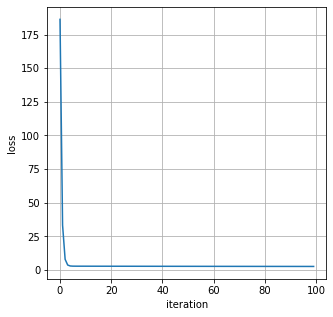

In [28]:
plt.figure(figsize=(5, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Gráfica de predicciones frente a objetivos (debería estar distribuída a lo largo de la recta $y=x$):

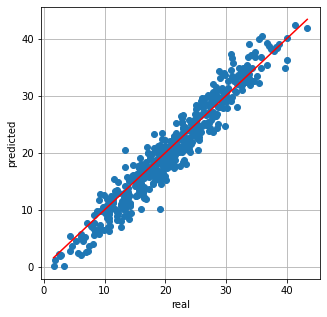

In [29]:
y = linrm.predict(dg.x)
plt.figure(figsize=(5, 5))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

#### <font color="#CA3532">Ejercicio 7</font> [1 punto] 

A continuación vamos a construir una red neuronal completa. Igual que antes, debes completar el código de la clase ``NeuralNetwork_TF`` rellenando todos los bloques marcados con un ``TO-DO``. 


In [30]:
class NeuralNetwork_TF(object):

    def mse_loss(y, t):
        loss = 0.5*tf.reduce_mean(tf.pow(y-t, 2.0))
        return loss

    def cross_entropy_loss(y, t):
        loss = -tf.reduce_mean(t*tf.math.log(y) + (1.-t)*tf.math.log(1.-y))
        return loss
     
    def __init__(self, layers=[(2, None), (1, tf.sigmoid)]):
        # Network weights and activations:
        self.nlayers = len(layers) - 1
        self.W = []
        self.b = []
        self.a = []
        for l0, l1 in zip(layers[:-1], layers[1:]):
            self.W.append(tf.Variable(tf.random.normal(shape=[l1[0], l0[0]], dtype=tf.dtypes.float64)))
            self.b.append(tf.Variable(tf.random.normal(shape=[l1[0], 1], dtype=tf.dtypes.float64)))
            self.a.append(l1[1])
            
    def predict(self, x):
        
        for layer in range(0,self.nlayers):
            if layer == 0:
                z = tf.matmul(self.W[layer],x) + self.b[layer]
                a = (self.a[layer](z))
            else:
                z = tf.matmul(self.W[layer],a) + self.b[layer]
                a = (self.a[layer](z))
        y = a
        
        return y
    
    def compute_gradients(self, x, t, loss_function):
        
        
        with tf.GradientTape(persistent=True) as tape:
            for layer in range(0,self.nlayers):
                if layer == 0:
                    z = tf.matmul(self.W[layer],x) + self.b[layer]
                    a = (self.a[layer](z))
                else:
                    z = tf.matmul(self.W[layer],a) + self.b[layer]
                    a = (self.a[layer](z))
            y = a
    
            loss = loss_function(y, t)
        
        db = []
        dW = []
        
        for layer in range(0,self.nlayers):
            db.append(tape.gradient(loss, self.b[layer]))
            dW.append(tape.gradient(loss, self.W[layer]))
        
        return db, dW
        
    #---------------------------------------------------------------------------
    # Gradient step:
    #---------------------------------------------------------------------------
    def gradient_step(self, x, t, eta, loss_function):
        dB, dW = self.compute_gradients(x, t, loss_function)

        for layer in range(0,self.nlayers):
            
            new_w = self.W[layer] - eta*dW[layer]
            self.W[layer].assign(new_w)
            new_b = self.b[layer] - eta*dB[layer]
            self.b[layer].assign(new_b)

    #---------------------------------------------------------------------------
    # Fit the model parameters to the training data x, t.
    # Return the loss at each training epoch.
    #---------------------------------------------------------------------------
    def fit(self, x, t, eta, num_epochs, batch_size, loss_function, verbose=False):
        (dim, n) = x.shape
        num_batches = (n // batch_size) + ((n % batch_size) != 0)
 
        loss = np.zeros(num_epochs)
        for i in range(num_epochs):
            # Shuffle data and generate batches:
            ix = np.random.permutation(n)
            for j in range(num_batches):
                imin = j*batch_size
                imax = np.minimum((j+1)*batch_size, n)
                
                ibatch = ix[imin:imax]
                batch_x = x[:, ibatch]
                batch_t = t[:, ibatch]
                self.gradient_step(batch_x, batch_t, eta, loss_function)

            # Calculo el loss de la epoca con todos los datos:
            loss[i] = self.get_loss(x, t, loss_function).numpy()
            # Print:
            if verbose:
                print("Epoch %d -- loss %f" % (i, loss[i]))
        return loss

    #---------------------------------------------------------------------------
    # Compute loss:
    #---------------------------------------------------------------------------
    def get_loss(self, x, t, loss_function):
        y = self.predict(x)
        return loss_function(y, t)

Puedes ejecutar las siguientes pruebas para chequear tu implementación.

Método ``predict``:

In [31]:
np.random.seed(17)
tf.random.set_seed(17)
x = np.random.randn(3, 20)

net = NeuralNetwork_TF([(3, None), (10, tf.sigmoid), (1, tf.sigmoid)])
y = net.predict(x)

# Tensor shape, should be (1, 20)
print(y.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX7/test_nn_tf_predict.pickle', 'rb') as handle:
    yexp = pickle.load(handle)
print(np.max(np.abs(y - yexp)))

(1, 20)
2.220446049250313e-16


Método ``compute_gradients``:

In [32]:
np.random.seed(17)
tf.random.set_seed(17)
x = np.random.randn(3, 20)
t = np.random.randn(1, 20)

net = NeuralNetwork_TF([(3, None), (10, tf.sigmoid), (1, tf.identity)])
db, dW = net.compute_gradients(x, t, NeuralNetwork_TF.mse_loss)

# Array shapes, should be:
# (10, 3)
# (10, 1)
# (1, 10)
# (1, 1)
for dwp, dbp in zip(dW, db):
    print(dwp.shape)
    print(dbp.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX7/test_nn_tf_compute_gradients.pickle', 'rb') as handle:
    [dWexp, dbexp] = pickle.load(handle)

for dwp, dbp, dwe, dbe in zip(dW, db, dWexp, dbexp):
    print(np.max(np.abs(dwp - dwe)))
    print(np.max(np.abs(dbp - dbe)))

(10, 3)
(10, 1)
(1, 10)
(1, 1)
8.326672684688674e-17
1.1102230246251565e-16
2.220446049250313e-16
0.0


Método ``fit`` (problema de regresión):

In [33]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=1000, seed=17, noise=1.0)
x = dg.x.transpose()
t = dg.t.transpose()

np.random.seed(23)
tf.random.set_seed(23)
net = NeuralNetwork_TF([(2, None), (1, tf.identity)])
loss = net.fit(x, t, 0.01, 100, 1000, NeuralNetwork_TF.mse_loss)
y = net.predict(x)

# Array shape, should be (1, 1000):
print(y.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX7/test_nn_tf_fit.pickle', 'rb') as handle:
    yexp = pickle.load(handle)
print(np.max(np.abs(y - yexp)))

(1, 1000)
7.105427357601002e-15


Gráfica de loss frente a número de iteraciones:

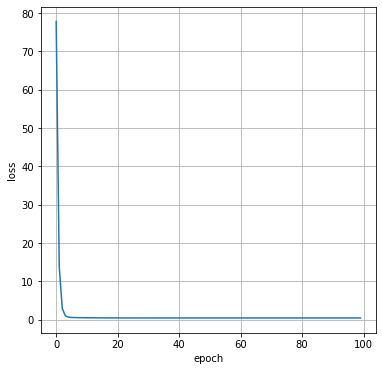

In [34]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Gráfica de predicciones frente a objetivos (debería estar distribuída a lo largo de la recta $y=x$):

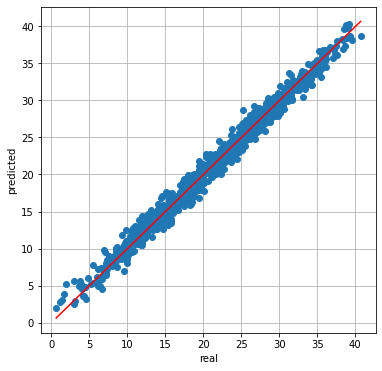

In [35]:
y = net.predict(x).numpy().transpose()
plt.figure(figsize=(6, 6))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

### <font color="#CA3532">Parte III: Optimización de hiperparámetros</font>


En esta parte de la práctica vamos a seguir trabajando con la base de datos de Forest Covertypes. Los datos deberían estar cargados en las variables ``x_train``, ``x_test``, ``t_train`` y ``t_test``:

In [36]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(406708, 54)
(174304, 54)
(406708,)
(174304,)


#### <font color="#CA3532">Ejercicio 8</font> [1 punto]

Construye una red neuronal para el problema Forest Covertypes, realizando una búsqueda lo más completa posible de los hiperparámetros con [Keras Tuner](https://keras-team.github.io/keras-tuner/documentation/tuners/). Debes considerar, al menos, los siguientes hiperparámetros:

- Learning rate.
- Número de capas ocultas.
- Número de unidades en las capas ocultas.
- Función de activación.
- Algún parámetro de regularización. 
- Optimizador.

Completa el código de las celdas siguientes en los lugares indicados, sin cambiar el nombre de la carpeta de logs.

**Nota:** Ten en cuenta que este ejercicio puede requerir mucho tiempo de ejecución. 

In [37]:
!pip install -q -U keras-tuner
import kerastuner as kt

<ipython-input-37-5d7b6944a6ac>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


<font color="#CA3532">[8.1]</font> Define el hipermodelo:

In [38]:
def model_builder(hp):
  #-------------------------------------------------------------
  # TO-DO: Incluye aquí los hiperparámetros a optimizar y sus posibles
  # valores. Como ejemplo se muestra el learning rate
    hp_learning_rate = hp.Choice('learning_rate', values = [1.0, 0.1, 0.01]) #Learning rate
    hp_lambda = hp.Choice('lambda', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) #Regularización
    hp_units = hp.Int('units', min_value = 32, max_value = 128, step = 32) #Numero neuronas
    hp_act = hp.Choice('act', values = ['sigmoid', 'relu']) #Función de activación
    hp_opt = hp.Choice('optimizer', values = ['adam', 'sgd']) #Optimizador
    hp_num_layers = hp.Int('layers', min_value = 2, max_value = 6) #Numero de capas
    
    #-------------------------------------------------------------

    model = keras.Sequential()
    #-------------------------------------------------------------
    # TO-DO: Completa la definición del modelo añadiendo las capas necesarias

    #-------------------------------------------------------------
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape =(54)))
   
    for i in range(hp_num_layers):
        model.add(keras.layers.Dense(units = hp_units, activation = hp_act, kernel_regularizer=keras.regularizers.l2(hp_lambda)))
        
    model.add(keras.layers.Dense(7, activation="softmax"))

    #-------------------------------------------------------------
    # TO-DO: Compila el modelo
    if hp_opt == 'adam':
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])   
    if hp_opt == 'sgd':  
        model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate), 
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])   
  #-------------------------------------------------------------
  
    return model

Borrado de la carpeta de logs:

In [ ]:
!rm -rf logs-proyecto/keras_tuner

Creación de un ``tuner`` de tipo ``Hyperband`` que usa el hipermodelo anterior. El objetivo a optimizar es la precisión (accuracy) sobre el conjunto de validación. El máximo número de épocas es 10.

In [39]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_acc', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'logs-proyecto/keras_tuner',
                     project_name = 'kt')  

INFO:tensorflow:Reloading Oracle from existing project logs-proyecto/keras_tuner\kt\oracle.json
INFO:tensorflow:Reloading Tuner from logs-proyecto/keras_tuner\kt\tuner0.json


Resumen del espacio de búsqueda. Comprueba que contiene todos los valores a considerar para cada uno de los hiperparámetros.

In [40]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
learning_rate (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01], 'ordered': True}
lambda (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
act (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}


<font color="#CA3532">[8.2]</font> Divide el conjunto de entrenamiento, de manera aleatoria, en dos subconjuntos. El primero, ``(tr_data, tr_labels)`` contendrá el 70% de los datos y lo usaremos para entrenar los hipermodelos. El segundo, ``(val_data, val_labels)`` contendrá el 30% de los datos y lo usaremos para validar los hipermodelos. Puedes usar [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``sklearn.model_selection``.

In [41]:
#-------------------------------------------------------------
# TO-DO: Genera los subconjuntos de datos (tr_data, tr_labels) y 
# (val_data, val_labels)
tr_data, val_data, tr_labels, val_lables = train_test_split(x_train, t_train, test_size=0.7, random_state =19)
#-------------------------------------------------------------

<font color="#CA3532">[8.3]</font> Realiza la búsqueda de los hiperparámetros llamando a ``tuner.search`` usando los datos ``tr_data``, ``tr_labels`` como conjunto de entrenamiento y los datos ``val_data``, ``val_labels`` como conjunto de validación: 

In [42]:
#-------------------------------------------------------------
# TO-DO: Realiza la búsqueda de los hiperparámetros
tuner.search(tr_data, tr_labels,
             epochs=10,
             validation_data=(val_data, val_lables))
#-------------------------------------------------------------

INFO:tensorflow:Oracle triggered exit


<font color="#CA3532">[8.4]</font> Selecciona los mejores hiperparámetros, vuelve a entrenar el modelo con todos los datos de entrenamiento y aplícalo al conjunto de test.

In [43]:
#-------------------------------------------------------------
# TO-DO: Selecciona los mejores hiperparámetros, reentrena el modelo con todos
# los datos y aplícalo al conjunto de test
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.values
#-------------------------------------------------------------

{'learning_rate': 0.1,
 'lambda': 0.001,
 'units': 32,
 'act': 'relu',
 'optimizer': 'sgd',
 'layers': 6,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '567a58108234cb1242f67b97b5c46633'}

In [44]:
model = tuner.hypermodel.build(best_hps)
model.fit(x_train, t_train, epochs = 10, validation_data = (x_test, t_test))

Epoch 1/10
12710/12710 [==============================] - 11s 867us/step - loss: 0.7232 - acc: 0.7378 - val_loss: 0.6505 - val_acc: 0.7554
Epoch 2/10
12710/12710 [==============================] - 11s 883us/step - loss: 0.6390 - acc: 0.7647 - val_loss: 0.6316 - val_acc: 0.7680
Epoch 3/10
12710/12710 [==============================] - 11s 897us/step - loss: 0.6309 - acc: 0.7713 - val_loss: 0.6804 - val_acc: 0.7531
Epoch 4/10
12710/12710 [==============================] - 11s 853us/step - loss: 0.6260 - acc: 0.7734 - val_loss: 0.6376 - val_acc: 0.7724
Epoch 5/10
12710/12710 [==============================] - 11s 868us/step - loss: 0.6277 - acc: 0.7749 - val_loss: 0.6458 - val_acc: 0.7718
Epoch 6/10
12710/12710 [==============================] - 11s 847us/step - loss: 0.6242 - acc: 0.7754 - val_loss: 0.6069 - val_acc: 0.7853
Epoch 7/10
12710/12710 [==============================] - 11s 843us/step - loss: 0.6259 - acc: 0.7764 - val_loss: 0.7476 - val_acc: 0.7282
Epoch 8/10
12710/12710 [===

#### <font color="#CA3532">Ejercicio 9</font> [1 punto]

Construye una red neuronal para el problema Forest Covertypes, realizando una búsqueda lo más completa posible de los hiperparámetros con el 
[HParams Dashboard](https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams) de ``tensorboard`` y usando una validación cruzada de 5 *folds*. Debes considerar, al menos, los siguientes hiperparámetros:

- Learning rate.
- Número de capas ocultas.
- Número de unidades en las capas ocultas.
- Función de activación.
- Algún parámetro de regularización. 
- Optimizador.

Completa el código de las celdas siguientes en los lugares indicados.

In [45]:
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import StratifiedKFold

<font color="#CA3532">[9.1]</font> Define el hipermodelo. Recuerda que debes hacer validación cruzada de ``5-folds`` y que la métrica ``accuracy`` se debe calcular como un promedio sobre las 5 particiones de validación.  

In [46]:
def train_test_model(hparams):

  # Validación cruzada de 5-folds
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

  # Bucle en folds:
  mean_accuracy = 0.0
  for itrain, itest in kfold.split(x_train, t_train):
    model = keras.Sequential()
    #-------------------------------------------------------------
    # TO-DO: Completa la definición del modelo añadiendo las capas necesarias
        
    model.add(keras.layers.InputLayer(input_shape =(54)))
   
    for i in range(hparams['num_layers']):
        model.add(keras.layers.Dense(units = hparams['num_units'], activation = hparams['activation'], kernel_regularizer=keras.regularizers.l2(hparams['lambda'])))
        
    model.add(keras.layers.Dense(7, activation="softmax"))

    #-------------------------------------------------------------
  
    #-------------------------------------------------------------
    # TO-DO: Compila el modelo
    
    #-------------------------------------------------------------
    if hparams['optimizer'] == 'adam':
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hparams['learning_rate']), 
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])   
    if hparams['optimizer'] == 'sgd':  
        model.compile(optimizer=keras.optimizers.SGD(learning_rate=hparams['learning_rate']), 
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])   
    #-------------------------------------------------------------
    # TO-DO: Entrena el modelo usando los índices itrain
    
    #-------------------------------------------------------------
    model.fit(x_train[itrain], t_train[itrain], epochs=1) 
    
    #-------------------------------------------------------------
    # TO-DO: Evalúa el modelo usando los índices itest y calcula el accuracy
    _, acc = model.evaluate(x_train[itest], t_train[itest])
    #-------------------------------------------------------------
    
    # Acumulamos el accuracy:
    mean_accuracy += acc
  
  return mean_accuracy/5.0

Función para ejecutar las pruebas con un hipermodelo:

In [47]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams) 
    accuracy = train_test_model(hparams)
    tf.summary.scalar('accuracy', accuracy, step=1)

Borrado de la carpeta de logs:

In [ ]:
!rm -rf logs-proyecto/hparam

<font color="#CA3532">[9.2]</font> Ejecuta los hipermodelos en bucle:

In [ ]:
session_num = 0

#-------------------------------------------------------------
# TO-DO: Crea el bucle que genera y evalúa los hipermodelos. A modo de 
# ejemplo se incluye un bucle para num_units

    
for num_units in [32, 64]:
    for num_layers in [2,4]:
        for learning_rate in [0.1, 0.01]:
            for activation in ['sigmoid', 'relu']:
                for optimizer in ['adam', 'sgd']:
                    for _lambda in [0.001, 0.0001]:                  
                          hparams = {
                              'num_units': num_units,
                              'num_layers': num_layers,
                              'learning_rate': learning_rate,
                              'activation': activation,
                              'optimizer': optimizer,
                              'lambda': _lambda
                          }
                          run_name = "run-%d" % session_num
                          print('--- Test: %s' % run_name)
                          print(hparams)
                          run('logs-proyecto/hparam/' + run_name, hparams)
                          session_num += 1
#-------------------------------------------------------------


Usa [tensorboard dev](https://tensorboard.dev/) para subir los logs generados a la nube (tendrás que autorizar a google para que publique los datos en tu cuenta). 

In [ ]:
!tensorboard dev upload --logdir logs-proyecto/hparam --name "MIAX-7 Ejercicio 9" \
    --description "Comparación de hiperparámetros" --one_shot

Tras ejecutar la celda anterior obtendrás un enlace para acceder al tensorboard con los resultados de tus pruebas. Copia el enlace a continuación para que pueda revisar las pruebas que has realizado.

In [48]:
#-------------------------------------------------------------
# TO-DO: Copia el enlace a tu TensorBoard, por ejemplo
print('''Enlace TensorBoard:
https://tensorboard.dev/experiment/DBlnTp5mQq2X88dr3KIl6g/''')
#-------------------------------------------------------------

Enlace TensorBoard:
https://tensorboard.dev/experiment/DBlnTp5mQq2X88dr3KIl6g/


<font color="#CA3532">[9.3]</font> Selecciona los mejores hiperparámetros, vuelve a entrenar el modelo con todos los datos de entrenamiento y aplícalo al conjunto de test.

In [49]:
#-------------------------------------------------------------
# TO-DO: Selecciona los mejores hiperparámetros, reentrena el modelo con todos
# los datos y aplícalo al conjunto de test
hparams = {
          'num_units': 64,
          'num_layers': 4,
          'learning_rate': 0.1,
          'activation': 'relu',
          'optimizer': 'sgd',
          'lambda': 0.0001
      }

hp.hparams(hparams) 

def model_training_best_params(hparams):
    
        model = keras.Sequential()
        #-------------------------------------------------------------
        # TO-DO: Completa la definición del modelo añadiendo las capas necesarias

        model.add(keras.layers.InputLayer(input_shape =(54)))

        for i in range(hparams['num_layers']):
            model.add(keras.layers.Dense(units = hparams['num_units'], activation = hparams['activation'], kernel_regularizer=keras.regularizers.l2(hparams['lambda'])))

        model.add(keras.layers.Dense(7, activation="softmax"))

        #-------------------------------------------------------------

        #-------------------------------------------------------------
        # TO-DO: Compila el modelo

        #-------------------------------------------------------------
        if hparams['optimizer'] == 'adam':
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=hparams['learning_rate']), 
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])   
        if hparams['optimizer'] == 'sgd':  
            model.compile(optimizer=keras.optimizers.SGD(learning_rate=hparams['learning_rate']), 
                        loss='sparse_categorical_crossentropy',
                        metrics=['acc'])   
        #-------------------------------------------------------------
        # TO-DO: Entrena el modelo usando los índices itrain

        #-------------------------------------------------------------
        model.fit(x_train, t_train, epochs=1) 
    #-------------------------------------------------------------
        return model
model = model_training_best_params(hparams)

12710/12710 [==============================] - 9s 663us/step - loss: 0.5777 - acc: 0.7682


In [50]:
#Aplicamos al conjunto de test
model.evaluate(x_test, t_test)

5447/5447 [==============================] - 3s 551us/step - loss: 0.5184 - acc: 0.7956


[0.5183706879615784, 0.7955812811851501]

### <font color="#CA3532">Parte IV: Redes neuronales aplicadas a un problema real</font>

El objetivo de esta parte de la práctica es obtener el mejor modelo posible para el problema [Tabular Playground Series - Jan 2022](https://www.kaggle.com/c/tabular-playground-series-jan-2022/overview).

#### <font color="#CA3532">Ejercicio 10</font> [1 punto]

Entrena una red neuronal para resolver el problema [Tabular Playground Series - Jan 2022](https://www.kaggle.com/c/tabular-playground-series-jan-2022/overview) de [kaggle](https://www.kaggle.com/). El modelo se debe entrenar y validar usando sólo los datos del fichero ``train.csv``, y posteriormente se debe aplicar a los datos del conjunto de test, ``test.csv``. Se valorarán, entre otras cosas, los siguientes puntos:

- El análisis inicial del problema y el tratamiento inicial de los datos. 

- La correcta selección de los hiperparámetros del modelo y la validación de los resultados.

- Los resultados obtenidos sobre el conjunto de test, evaluados a través de la web de [kaggle](https://www.kaggle.com/), y el ranking obtenido en el [public leaderboard](https://www.kaggle.com/c/tabular-playground-series-jan-2022/leaderboard).

- Las conclusiones finales.

Como ayuda, se facilitan a continuación los ficheros de datos y se muestra cómo cargarlos como [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) de [pandas](https://pandas.pydata.org/).

In [33]:
train = pd.read_csv('MIAX7/data/kaggle/train.csv').set_index("row_id")
test = pd.read_csv('MIAX7/data/kaggle/test.csv').set_index("row_id")
sample_submission = pd.read_csv("MIAX7/data/kaggle/sample_submission.csv")

- En primer lugar importo las librerías que voy a necesitar

In [3]:
from sklearn import preprocessing
import keras_tuner as kt

- Realizo un análisis exploratorio de los datos:

In [34]:
train.info() #Analizo la tipología de datos que voy a tratar

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      26298 non-null  object
 1   country   26298 non-null  object
 2   store     26298 non-null  object
 3   product   26298 non-null  object
 4   num_sold  26298 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


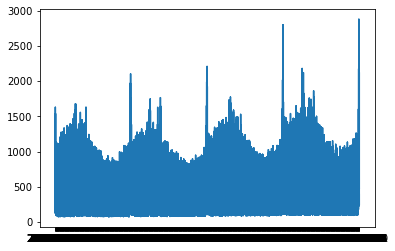

In [35]:
plt.plot(train.date, train.num_sold)
plt.show()

- Se puede observar que existe estacionalidad en los datos, lo que supone que en determinadas fechas a lo largo de los años se produce un mayor número de ventas. Mi objetivo es que la red neuronal sea capaz de detectar en qué momentos se producen esos picos de ventas para intentar predecirlas. 

In [36]:
train.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


En cuanto a los datos que nos proporcionan, comentar que nos dan una columna de fechas en formato string, el país, las tiendas, los productos, y el número de productos vendidos. Viendo estos datos, y teniendo en cuenta la estacionalidad detectada anteriormente, parece interesante centrarse en las fechas para generar nuestras características. Para ello vamos a desarrollar una función que se va a encargar de genererar nuestras características. 

La función *feature_engineering* se va a encargar de generar nuestras características:

- En primer lugar, vamos a convertir la columna date (formato string) a un vector de fechas en formato datetime de pandas, lo cual nos va a permitir desengranar las fechas usando pandas datetime (dt). Este método permite detectar en qué mes, año, día, o semana está cada una de las fechas. Por ello, vamos a generarnos un dataframe de características en el que vamos a tener como columnas: El año en el que estamos, el mes, la semana, el día del mes, el día de la semana, si estamos en fin de semana o no, el día en términos anuales, y el trimestre en el que nos encontramos. 

Considero que éstas características deberían ser suficientes para que nuestra red neuronal pueda detectar patrones estacionales. 

- En segundo lugar, vamos a convertir las columnas de país, tienda, producto, y año en variables dummy; ya que de poco le va a servir a la red tener unas variables string que definan un país. Creo que es mejor convertirlo a variables númericas. Para conseguir el resultado deseado, vamos a utilizar la funcion preprocessing de sklearn y su método LabelEncoder(). 

La idea es al final obtener un dataframe con todas las variables númericas. Además, esta misma función nos devuelve un dataframe con las features y otro dataframe con el target (productos vendidos).


In [37]:
def feature_engineering(df, fase):
    
    #Convierto los date-strings en datetime
    dates = pd.to_datetime(df.date)
    
    #Aprovechamos las funciones dt de pandas para desgranar las fechas
    df['año'] = dates.dt.year.astype(float)
    df['mes'] = dates.dt.month.astype(float)
    df['semana'] = dates.dt.isocalendar().week.astype(float)
    df['dia'] = dates.dt.day.astype(float)
    df['dia_semana'] = dates.dt.weekday.astype(float)
    df['fin_de_semana'] = (dates.dt.weekday>4).astype(float)
    df['dia_anual'] = dates.dt.dayofyear.astype(float)
    df['trimestre'] = dates.dt.quarter.astype(float)
    
    
    #Preprocesamos los datos string en variables dummy
    encoder = preprocessing.LabelEncoder()
    for column in ['country', 'store', 'product', 'año']:
        df[column] = encoder.fit_transform(df[column]).astype(float)
    
    #Elimino la columna date-string y el target
    if fase == 'train':
        target = df['num_sold']
        df = df.drop(['date', 'num_sold'], axis = 1)
        return df, target
    if fase == 'test':
        df = df.drop(['date'], axis = 1)
        return df
    

In [39]:
features, target = feature_engineering(train, 'train')

- Vemos el resultado obtenido:

In [40]:
features.head()

,country,store,product,año,mes,semana,dia,dia_semana,fin_de_semana,dia_anual,trimestre
row_id,,,,,,,,,,,
0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
2,0.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0


- Separo mis datos en train y test:

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

- Leyendo la descripción del problema en Kaggle, me he dado cuenta de que nuestros resultados se van a analizar midiendo las diferencias entre nuestros resultados y los verdaderos usando la función de coste SMAPE. Como no se encuentra definida dentro de keras, he buscado por internet la función para calcularla:

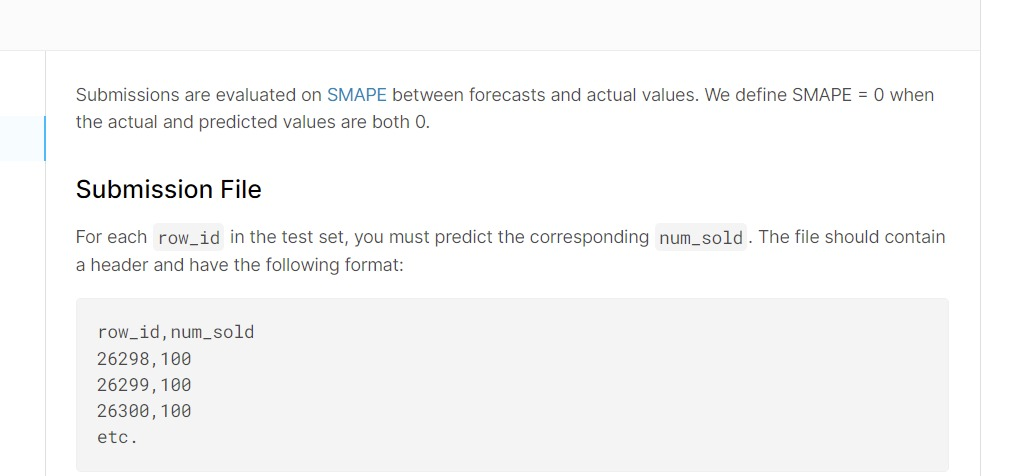

In [43]:
from IPython.display import Image
Image(filename='funcion_coste_kaggle.jpeg') 

In [44]:
def smape(y_true, y_pred):
   y_true = tf.cast(y_true, tf.float32)
   y_pred = tf.cast(y_pred, tf.float32)
   num = tf.math.abs(tf.math.subtract(y_true, y_pred))
   denom = tf.math.add(tf.math.abs(y_true), tf.math.abs(y_pred))
   denom = tf.math.divide(denom,200.0)

   val = tf.math.divide(num,denom)
   val = tf.where(denom == 0.0, 0.0, val)
        
   return tf.reduce_mean(val)

- El modelo que vamos a generar va a ser una red neuronal densa que va a tener como hiperparámetros a optimizar: Learning rate, lambda, unidades por capa, funciones de activación, optimizadores, número de capas, y dropout. Además, para cada capa vamos a instertar la inicialización de xavier, batch normalization, y dropout (optimizable). 

In [9]:
def model_builder(hp):
  
    hp_learning_rate = hp.Choice('learning_rate', values = [0.1, 0.01, 0.001, 0.0001]) #Learning rate
    hp_lambda = hp.Choice('lambda', values = [0.01, 0.001, 0.0001]) #Regularización
    hp_units = hp.Int('units', min_value = 32, max_value = 500, step = 32) #Numero neuronas
    hp_act = hp.Choice('act', values = ['sigmoid', 'relu']) #Función de activación
    hp_opt = hp.Choice('optimizer', values = ['adam', 'sgd']) #Optimizador
    hp_num_layers = hp.Int('layers', min_value = 2, max_value = 10) #Numero de capas
    hp_dropout = hp.Choice('dropout', values = [0.2, 0.3, 0.4, 0.5]) #Probabilidad dropout
    
    #-------------------------------------------------------------
    
    model = keras.Sequential()
    
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape =(11)))
   
    for i in range(hp_num_layers):
        model.add(keras.layers.Dense(units = hp_units, kernel_initializer=keras.initializers.glorot_normal(),
                                     kernel_regularizer=keras.regularizers.l2(hp_lambda)))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation(hp_act))
        model.add(keras.layers.Dropout(rate= hp_dropout))
        
        
    model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_normal(),
                                     kernel_regularizer=keras.regularizers.l2(hp_lambda), 
                                      activation="linear"))

   
    if hp_opt == 'adam':
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                loss=smape)   
    if hp_opt == 'sgd':  
        model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate), 
                    loss=smape)   
  #-------------------------------------------------------------
  
    return model

- Vamos a optimizar nuestro modelo utilizando keras tuner y el loss en validación como objetivo. 

In [11]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_loss', 
                     max_epochs = 50,
                     factor = 5,
                    directory = 'd')  

- Partimos nuestros datos de entrenamiento en train y validación. 

In [12]:
tr_data, val_data, tr_labels, val_lables = train_test_split(x_train, y_train, test_size=0.7)

- Defino un early stop para la optimización de nuestros datos, ya que hemos puesto 50 épocas y en determinadas ocasiones no será necesario avanzar tanto. De este modo ganamos tiempo a la hora de entrenar nuestro modelo. 

In [13]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [14]:
tuner.search(tr_data, tr_labels,
             epochs=50,
             validation_data=(val_data, val_lables), 
            callbacks=[stop_early])

Trial 59 Complete [00h 00m 50s]
val_loss: 83.7784423828125

Best val_loss So Far: 24.606101989746094
Total elapsed time: 00h 09m 29s
INFO:tensorflow:Oracle triggered exit


- Obtenemos los mejores hiperparámetros:

In [15]:
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.values

{'learning_rate': 0.01,
 'lambda': 0.0001,
 'units': 480,
 'act': 'relu',
 'optimizer': 'adam',
 'layers': 4,
 'dropout': 0.2,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 10,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': 'f7159a042dc1de0178f641adedcf29ed'}

- Reentrenamos nuestro modelo con todos los datos de entrenamiento. Una vez más utilizamos early stopping porque vamos a usar 100 épocas y es muy probable que con menos sean suficientes. 

In [16]:
model = tuner.hypermodel.build(best_hps)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(x_train, y_train, epochs = 100, callbacks = [stop_early])

Epoch 1/100
576/576 [==============================] - 4s 6ms/step - loss: 40.1023
Epoch 2/100
576/576 [==============================] - 3s 6ms/step - loss: 27.4784
Epoch 3/100
576/576 [==============================] - 3s 6ms/step - loss: 26.1008
Epoch 4/100
576/576 [==============================] - 3s 6ms/step - loss: 24.2595
Epoch 5/100
576/576 [==============================] - 3s 6ms/step - loss: 22.3279
Epoch 6/100
576/576 [==============================] - 3s 6ms/step - loss: 22.2419
Epoch 7/100
576/576 [==============================] - 3s 6ms/step - loss: 21.8547
Epoch 8/100
576/576 [==============================] - 3s 6ms/step - loss: 20.9697
Epoch 9/100
576/576 [==============================] - 3s 6ms/step - loss: 19.7969
Epoch 10/100
576/576 [==============================] - 3s 6ms/step - loss: 19.5569
Epoch 11/100
576/576 [==============================] - 3s 6ms/step - loss: 19.1834
Epoch 12/100
576/576 [==============================] - 3s 6ms/step - loss: 18.4338
E

- Probamos nuestro modelo con los datos de test generados a partir de nuestros datos de entrenamiento:

In [17]:
y = model.predict(x_test)

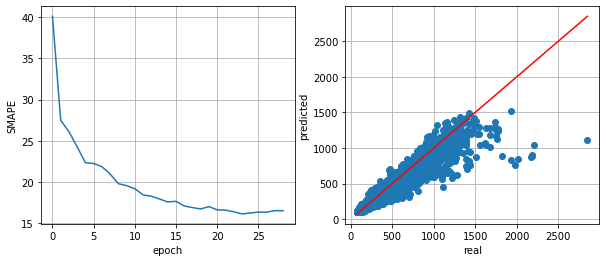

In [18]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('SMAPE')


plt.subplot(1,2,2)
plt.plot(y_test, y, 'o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.grid(True)
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()

- Viendo los resultados obtenidos, nos hemos acercado a los datos reales pero tenemos mucho margen de mejora. Al final del código expondré mi razonamiento de cómo se podría intentar mejorar este modelo.

Generamos las características para nuestros datos de test y realizamos las predicciones. Posteriormente adaptamos los resultados al formato que se nos exige:

In [20]:
x = feature_engineering(test, 'test')

In [21]:
results = model.predict(x)

In [22]:
result_format = pd.DataFrame()
result_format['row_id'] = x.index.values
result_format['num_sold'] = results[:,0]
result_format.to_csv('results.csv',index=False)

In [50]:
result_format.head()

,row_id,num_sold
0,26298,183.407730
1,26299,358.217712
2,26300,95.391251
3,26301,349.695312
4,26302,624.716064


- Mis resultados en kaggle basados en dos intentos; siendo el primero el mejor de ellos. 

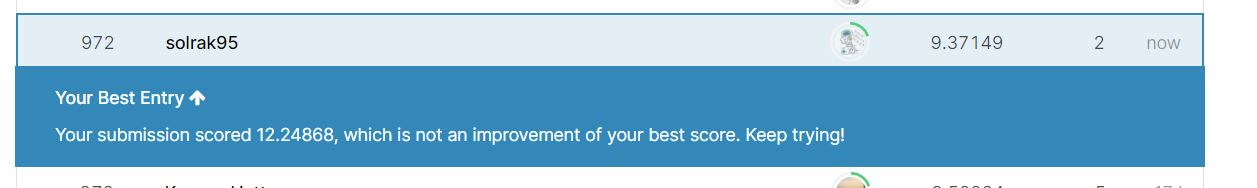

In [31]:
Image(filename='Captura.jpg') 

- Como conclusión al ejercicio realizado, me gustaría remarcar aglunas observaciones que creo que se deberían tener en cuenta:

1) Si analizamos los resultados obtenidos, vemos como el accuracy obtenido es realmente bajo o inexistente, ya que es imposible poder predecir el número de ventas en el futuro. En cualquier caso, se debería atacar el problema pensando en una estimación de las ventas. Además, creo que con los datos proporcionados es imposible ni siquiera llegar a hacer una estimación. Al final, la red lo que acaba aprendiendo es que existe una estacionalidad en las ventas, e intentará replicar las bajadas y las subidas en base a los días del año en que se encuentre. No obstante, para poder realizar una aproximación a las ventas, sería necesario trabajar con datos adicionales como las finanzas de la empresa e indicadores macroeconómicos de cada país. 

2) Respecto al tratamiento de los datos como una serie temporal, asumo que realizar el train_split de sklearn no es la opción más deseable. Al final, train_split te devuelve el % de datos para entrenamiento pero generados aleatoriamente; de modo que se estaría violando la secuencialidad de las series temporales. Creo que sería más interesante atacar el problema usando una partición por grupos con un time_step para que la red tenga en cuenta datos anteriores secuenciales a la hora de predecir la etiqueta final. 